In [23]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np

Draw a 200 samples each from these two distributions

* A sample `s1` from a 2-D Gaussian with mean = `[1,1]` and covariance matrix cov = `[[1,0],[0,1]]`
* A sample `s2` from a 2-D 1 Gaussian with mean = `[0,0]` and covariance matrix cov = `[[1,0.8],[0.8,1.0]]`


In [24]:
s1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]], size = 200)
s2 = np.random.multivariate_normal([0,0],[[1,0.8],[0.8,1.0]], size = 200)

Prepare a scatter plot of both these sets of samples on the 2-D plane, with the markers having two different colors

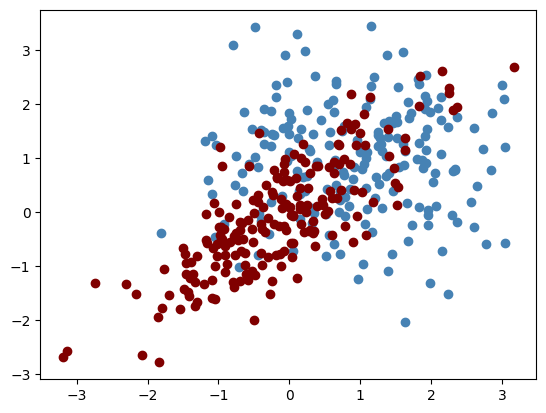

In [25]:
plt.scatter(s1[:,0],s1[:,1], label = 's1', c = 'steelblue')
plt.scatter(s2[:,0],s2[:,1], label = 's2', c = 'maroon')

As discussed in the lecture, the simples neural network is the "Perceptron" 

$$
f(\vec{x}; \vec{w},b) = \Phi(\sum w_i x_i - b) = \Phi(\vec{w}\cdot\vec{x} - b)
$$,

where $\Phi$ is the heaviside step function.

Write a function that implements the perceptron model and is able to evaluate a input sample for $w_1 = 0.2$, $w_2 = 0.4$ and $b = 0.7$

In [26]:
w1 = 0.2
w2 = 0.6
b = 0
def evaluate(x):
    r = (w1*x[0] + w2*x[1]) - b
    return 1 if r > 0 else 0

Evaluate the function on a 2-D grid with 100 x 100 points and visualize what the function value looks like in the 2-D plane

10000

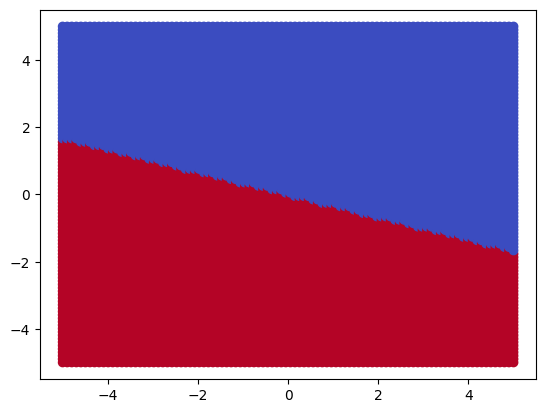

In [27]:
points = []
for x in np.linspace(-5,5,100):
    for y in np.linspace(-5,5,100):
        r = evaluate([x,y])
        points.append([x,y,r])
    
points = np.array(points)
plt.scatter(points[:,0],points[:,1], c =points[:,2], cmap = 'coolwarm_r')
len(points)

As above, we often will want to evaluate a function on many points at once. Therefore it's useful to write the function in a way such that we can quickly do so. 

One way to to this is via "matrix multiplication" 

$$
    r = \Phi(X w^T - b)
$$

where $X$ is a (N,2) matrix and $w^T$ is the transpose of the weight vector $\vec{w}$ (i.e. column vector or (2,1) matrix)

Write a function that can evaluate $N$ points in one go, by making use of this relationship

In [28]:
w = np.array([w1,w2])
def evaluate_multiple(X):
    ones = np.ones(len(X))
    zeros = np.zeros(len(X))
    #value = np.matmul(X,w) - b
    value = np.tensordot(X , w, (1, 0)) - b
    return np.where(value > 0, ones, zeros)

Sample 10,000 points in the 2-D input space uniformly between (-5,5) and evaluate those points using the perceptron model

Additionally re-add the scatter plot of the two Gaussian samples

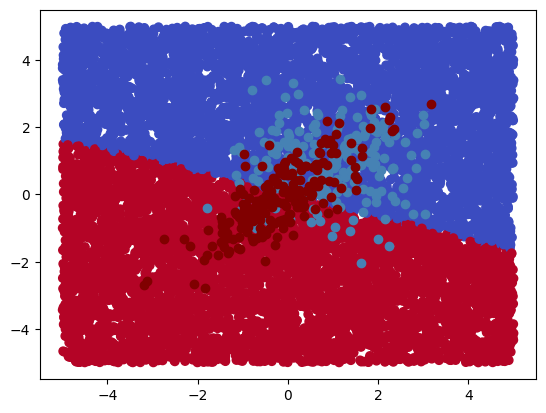

In [29]:
uniformX = np.random.uniform(-5,5,size = (10000,2))
r = evaluate_multiple(uniformX)

plt.scatter(uniformX[:,0],uniformX[:,1], c = r, cmap = 'coolwarm_r')

plt.scatter(s1[:,0],s1[:,1], c = 'steelblue')
plt.scatter(s2[:,0],s2[:,1], c = 'maroon')

* Evaluate both Gaussian samples with the perceptron model.
* Create a histogram for the output of the histogram of the two samples.

(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x2654fcf5b50>])

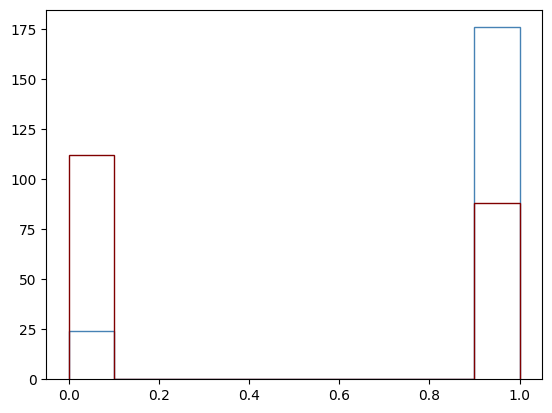

In [30]:
plt.hist(evaluate_multiple(s1), histtype = 'step', edgecolor = 'steelblue')
plt.hist(evaluate_multiple(s2), histtype = 'step', edgecolor = 'maroon')

Out of the 200 samples in `s1`, for how many events does the perceptron return 1 or zero respectively? 

How about for the sample `s2`?

In [31]:
counts_s1 = np.unique(evaluate_multiple(s1), return_counts = True)
counts_s2 = np.unique(evaluate_multiple(s2), return_counts = True)

print(counts_s1)
print(counts_s2)

(array([0., 1.]), array([ 24, 176], dtype=int64))
(array([0., 1.]), array([112,  88], dtype=int64))


Let's say the samples of s1 should of of type `1` and the samples of s2 are of type `0`. What's the accuracy (as a percentage) of the perceptron model in predicting the right type?

In [32]:
(counts_s1[1][1] + counts_s2[1][0])/(len(s1)+len(s2))

0.72

This type we have you values for $w_1$, $w_2$, and $b$.. can you find values that are better at this prediction tasks?